### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

### 2.Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\G.SAI KRISHNA\Desktop\ML_Projects\ML_GFG\train.csv')

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### 3.Data Preprocessing

In [5]:
#Handling Null Values
data = data.dropna(axis=0)

In [6]:
data['x'].max()

100.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### 4.Data Splitting

In [8]:
train_input = np.array(data.iloc[0:500,0]).reshape(500,1)
train_output = np.array(data.iloc[0:500,1]).reshape(500,1)

test_input = np.array(data.iloc[500:700,0]).reshape(199,1)
test_output = np.array(data.iloc[500:700,1]).reshape(199,1)

In [9]:
train_input.shape

(500, 1)

In [10]:
train_output.shape

(500, 1)

In [11]:
test_input.shape

(199, 1)

In [12]:
test_output.shape

(199, 1)

# <font color="green">5.Polynomial Regression</font>

## Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=2)
train_input_poly = poly_regressor.fit_transform(train_input)
poly_regressor.fit(train_input,train_output)

PolynomialFeatures()

In [14]:
train_input_poly

array([[1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.500e+01, 2.250e+02],
       ...,
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 8.100e+01, 6.561e+03],
       [1.000e+00, 9.700e+01, 9.409e+03]])

In [15]:
linear_regressor = LinearRegression()
linear_regressor.fit(train_input_poly,train_output)

LinearRegression()

## Predicting Test Values

In [16]:
test_input_poly = poly_regressor.fit_transform(test_input)
poly_regressor.fit(test_input,test_output)

PolynomialFeatures()

In [17]:
predicted_value = linear_regressor.predict(test_input_poly)

In [18]:
predicted_value

array([[ 4.46957573],
       [60.99608394],
       [47.00554813],
       [97.51828372],
       [29.89058614],
       [62.98705348],
       [-0.65061901],
       [99.47374049],
       [17.72593351],
       [29.89058614],
       [97.51828372],
       [15.69177278],
       [21.78849616],
       [55.01165768],
       [42.99097571],
       [74.89255892],
       [90.65906809],
       [46.00262488],
       [84.76102421],
       [55.01165768],
       [35.94699773],
       [49.00995493],
       [93.60161134],
       [42.99097571],
       [21.78849616],
       [36.95472001],
       [23.81689807],
       [94.58149929],
       [60.99608394],
       [74.89255892],
       [67.95607903],
       [58.00603037],
       [ 4.46957573],
       [53.0130097 ],
       [79.83279034],
       [82.79117037],
       [24.83037917],
       [33.93011348],
       [25.84338036],
       [89.67726053],
       [59.99987932],
       [49.00995493],
       [18.74229403],
       [91.64039574],
       [28.87950455],
       [ 7

## Visualizing Model Performance

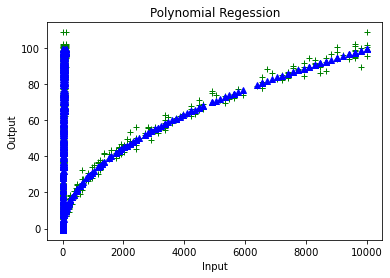

In [19]:
plt.figure()
plt.plot(test_input_poly,test_output,'+',color="green")
plt.plot(test_input_poly,predicted_value,'^',color="blue")
plt.title("Polynomial Regession")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(predicted_value,test_output)
error

8.063337564451183

In [21]:
print("Accuracy : "+str(100 - error)+"%")

Accuracy : 91.93666243554881%
